In [1]:
import torch 

# Introduction to Pytorch 

Pytorch is an Imperative Style, High-Performance, Pythonic
Deep Learning library [1].

It supports natively hardware accelerators, such as GPUs, democratises the development, learning and deployment of deep learning models.

[1] Paszke, Adam, et al. "Pytorch: An imperative style, high-performance deep learning library." Advances in neural information processing systems. 2019.

# The $\texttt{pytorch}$ tensor: A python object for high performing array operations.

### From a $\texttt{numpy}$ array to a $\texttt{pytorch}$ tensor

Basically, if you are comfortable in $\texttt{numpy}$ array, you will be comfortable in $\texttt{pytorch}$ tensor.



In [2]:
import numpy as np

x_np = np.asarray([-1., 0., 1.])
x_np

array([-1.,  0.,  1.])

In [3]:
x_torch = torch.tensor([-1., 0., 1.])
x_torch

tensor([-1.,  0.,  1.])

array and tensor are different python objects

In [4]:
x_np == x_torch

False

it's easy to switch from one to the other

In [5]:
x_np == x_torch.numpy()

array([ True,  True,  True])

In [6]:
torch.tensor(x_np) == x_torch 

tensor([True, True, True])

In [7]:
x_torch == x_torch.data 

tensor([True, True, True])

You have plenty of implemented methods

In [8]:
x_np = np.random.randn(10)
x_torch = torch.randn(10)

x_np.mean(), x_torch.mean()
x_np.max(), x_torch.max()
# and many others...

(1.7612448152275162, tensor(2.7042))

and even more for pytorch

In [9]:
try: 
  x_np.abs()
except:
  print('Not implemented in numpy')

x_torch.abs()

Not implemented in numpy


tensor([0.8217, 0.3451, 0.5822, 2.7042, 0.2980, 0.1788, 1.5437, 0.2312, 0.1226,
        0.3549])

In [10]:
try: 
  x_np.exp()
except:
  print('Not implemented in numpy')

x_torch.exp()

Not implemented in numpy


tensor([ 0.4397,  1.4121,  0.5587, 14.9421,  1.3472,  0.8363,  4.6818,  1.2601,
         1.1305,  0.7012])

Be careful with copy both in numpy and pytorch 

In [11]:
x_np = np.asarray([-1., 0., 1.])
x = x_np
x += 1
x_np 

array([0., 1., 2.])

In [12]:
x_torch = torch.tensor([-1., 0., 1.])
x = x_torch
x += 1
x_torch

tensor([0., 1., 2.])

In [13]:
x_np = np.asarray([-1., 0., 1.])
x = x_np.copy()
x += 1
x_np 

array([-1.,  0.,  1.])

In [14]:
x_torch = torch.tensor([-1., 0., 1.])
x = x_torch.clone() # Copy 
x += 1
x_torch

tensor([-1.,  0.,  1.])

but a tensor comes with new attributes... 

In [15]:
x_torch.device

device(type='cpu')

a tensor is stored on a specified device, here a CPU. It is possible to send it to a GPU, if you have one ;) 

In [16]:
# It is straightforward to send a tensor on a GPU
x_torch = x_torch.cuda()
x_torch 

tensor([-1.,  0.,  1.], device='cuda:0')

wait... WHAT? 

click on execution -> execution type -> GPU accelarator



In [17]:
!nvidia-smi

Wed Oct 28 09:37:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    39W / 300W |   1187MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### CUDA: Accelerated calculus on GPU
In this section, we will benchmark computation time of high-dimensional matrix multiplication

In [18]:
import time 
from tqdm import tqdm_notebook as tqdm 

In [19]:
n = 100
x = np.random.randn(1000, 1000)

tic = time.clock()
for _ in tqdm(range(n)):
  
  np.matmul(x, x)
tac = time.clock()
print('Time with numpy array', tac - tic)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """



Time with numpy array 12.707472


In [20]:
n = 100
x = torch.randn(1000, 1000)

tic = time.clock()
for _ in tqdm(range(n)):
  torch.matmul(x, x)
tac = time.clock()
print('Time with a cpu stored tensor', tac - tic)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """



Time with a cpu stored tensor 2.0466300000000004


In [21]:
n = 100
x = torch.randn(1000, 1000)
x = x.cuda()

tic = time.clock()
for _ in tqdm(range(n)):
  torch.matmul(x, x)
tac = time.clock()
print('Time with gpu stored tensor', tac - tic)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Time with gpu stored tensor 0.028513000000000233


### Autograd: efficient library for automatic differentiation

In [22]:
x = torch.tensor(1.)
x.requires_grad = True 
print(x, x.grad)

tensor(1., requires_grad=True) None


In [23]:
t = torch.tensor(0., requires_grad=True)
x = torch.tensor(1., requires_grad=True)
y = x**2*t

Compute $\frac{\partial y}{\partial x}$ and $\frac{\partial y}{\partial t}$

In [24]:
dy_dx = torch.autograd.grad(y, x, retain_graph=True)
dy_dx

(tensor(0.),)

In [25]:
dy_dt = torch.autograd.grad(y, t, retain_graph=True) # Check what happens when not specifying retain_graph = True
dy_dt

(tensor(1.),)

Hopefully, pytorch has a straightforward way to compute the derivative of a computational graph.


In [28]:
t = torch.tensor(0., requires_grad=True)
x = torch.tensor(1., requires_grad=True)
y = x**2*t

y.backward() # Computes derivatives with respect to *all* variables y in the computational graph of y.

where are stored the derivatives?

In [29]:
print(x.grad, t.grad)

tensor(0.) tensor(1.)


#### Exercise: Finds local minimum of a function by gradient descent

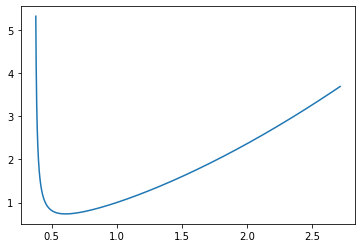

In [34]:
import matplotlib.pyplot as plt

def J(x, convex=True):
  if convex:
    return x**2/(1+torch.log(x))
  else:
    return x**2/(1+torch.log(x))*torch.sin(np.pi*x)

x = torch.arange(np.exp(-1.)+0.01, np.exp(1.), 0.001)

plt.plot(x.numpy(), J(x).numpy())
plt.show()

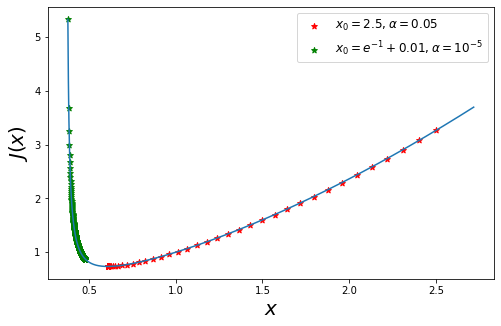

In [36]:
def gradient_descent(x, f, lr=0.05):
  # Computes f(x) and updates x = x - lr*grad_x(f)(x)
  x = x.clone().detach().requires_grad_(True)
  y = f(x)
  y.backward()
  x = #TODO: x = x - lr*grad_x(f)(x)
  return x 

plt.figure(figsize=(8,5))

x = torch.tensor(2.5, requires_grad=True)
x_updates = [x.clone().detach().numpy()]
for _ in range(100):
  x = gradient_descent(x, J)
  x_updates.append(x.clone().detach().numpy())
plt.scatter(x_updates, J(torch.tensor(np.asarray(x_updates))).numpy(), marker='*', color='red', label=r'$x_0=2.5, \alpha=0.05$')


x = torch.tensor(np.exp(-1.)+0.01, requires_grad=True)
x_updates = [x.clone().detach().numpy()]
for _ in range(1000):
  x = gradient_descent(x, J, lr=0.00001) # Play with the learning rate (until 0.00001)
  x_updates.append(x.clone().detach().numpy())
plt.scatter(x_updates, J(torch.tensor(np.asarray(x_updates))).numpy(), marker='*', color='green', label=r'$x_0=e^{-1} + 0.01, \alpha=10^{-5}$')


x = torch.arange(np.exp(-1.)+0.01, np.exp(1.), 0.001)
plt.plot(x.numpy(), J(x).numpy())

plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$J(x)$', fontsize=20)
plt.legend(fontsize=12)
plt.show()

#How to build a deep model

## Parameters: a tensor with new properties

Learning a model is equivalent to find a set of parameters which achieves a cost optimality. 

For instance, linear regression consists in finding $\theta$ such that:
$$\mathcal L(\theta) := \frac 1 n \sum_{i=1}^n (y_i - x_i^\top \theta)^2 $$
is minimal for some data $(x_i, y_i)_{1 \leq i \leq n}$.

In order to differentiate the role of a variable (here $x$ and $y$) with parameters of a model (here $\theta$), pytorch provides an object named parameter.

Roughly, parameters can be used in the same way as tensors. But they offer new persepective, for instance by interacting substantially with other pytorch objects (module and optim). 

See how finding a local minimum is performed when using a pytorch parameter.




In [37]:
import torch.nn as nn 

x_param = nn.Parameter(torch.tensor(3.))
x_param

Parameter containing:
tensor(3., requires_grad=True)

In [39]:
optimizer = torch.optim.SGD(params=[x_param], lr=0.05)
for _ in range(1000):
  optimizer.zero_grad() # Cleans gradients in the scope of the optimizer (here x_param), comment it to see how gradients accumulate
  y = J(x_param) # Get the computation graph (note that parameters behave similarly than tensor for calculus)
  y.backward() # Computes the gradient
  optimizer.step() # Updates parameter value wrt the rule defined by the optimizer: (here x = x - 0.05*grad_x(f)(x))
print(x_param)

Parameter containing:
tensor(0.6065, requires_grad=True)


#### Exercise: Logistic regression 
We study the case where data is generated through the causal graph: 
$$Y \to X$$
where, 
$$ Y \sim \mathrm{Bernouilli}(b)$$
$$ X = Y(\Delta \mu + \mathcal N(0,1)) + (1-Y)(-\Delta \mu + \mathcal N(0,1)) $$

In [40]:
class DataGenerator:
  def __init__(self, dim=100, delta_mu=0.2, bias=0.5):
    self.dim = dim 
    self.delta_mu = delta_mu
    self.bias = bias

  def samples(self, n):
    y = np.random.rand(n, 1) > self.bias
    x = #TODO
    return x, y 
data_generator = DataGenerator()

In [41]:
x_train, y_train = data_generator.samples(n=10000)
x_test, y_test = data_generator.samples(n=1000)

print(x_train.shape, y_train.shape)

(10000, 100) (10000, 1)


In [42]:
# How we do it with scikit-learn

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
#Fit a Logistic Regression model

Accuracy 0.97
Parameters [[0.32077525 0.48474266 0.37262096 0.55011523 0.47916615 0.37615696
  0.40995074 0.51889771 0.53062025 0.34597541 0.47758429 0.59521604
  0.37566005 0.37652256 0.4702667  0.50122349 0.48772543 0.45196777
  0.35306913 0.41050051 0.36546079 0.38631913 0.38773511 0.2916256
  0.50187804 0.34867004 0.30803824 0.52772852 0.48233993 0.35000114
  0.46938271 0.42034926 0.27483909 0.4759805  0.39937163 0.33092669
  0.34110772 0.32158364 0.41418782 0.36916834 0.48902825 0.46622338
  0.35346844 0.3748196  0.50238179 0.38474986 0.4230819  0.46737038
  0.44680709 0.50462135 0.47683729 0.42925706 0.46314826 0.36415512
  0.45677165 0.59742804 0.35737901 0.4145201  0.3083899  0.39130996
  0.23437547 0.37378671 0.44869682 0.51450059 0.44605343 0.28336687
  0.40928953 0.49564778 0.44198961 0.41225323 0.37943292 0.4028841
  0.48450453 0.37144391 0.46086275 0.43679798 0.33294641 0.4331818
  0.44378862 0.38513989 0.52014839 0.34750673 0.56060327 0.33217502
  0.42881006 0.4243778  0.

In [43]:
theta = nn.Parameter(torch.randn(data_generator.dim)) # Initialize randomly parameters
print('Initialized parameter', theta)

batch_size = 32
num_iter = 1000

optimizer = torch.optim.Adam(params=[theta], lr=0.01, weight_decay=1e-2) # Weight decay is the L^2 penalty

for _ in tqdm(range(num_iter)):
  optimizer.zero_grad()
  x, y = data_generator.samples(batch_size)

  x = torch.tensor(x).float()
  y = torch.tensor(y).float()
  y_hat = nn.Sigmoid()(torch.matmul(x, theta))

  loss = nn.BCELoss()(y_hat, y)
  loss.backward()
  optimizer.step()

print('Learned parameter', theta)

y_hat = (nn.Sigmoid()(torch.matmul(torch.tensor(x_test).float(), theta)) > 0.5).float()
print('Accuracy', (torch.tensor(y_test.reshape(-1)).float() == y_hat).float().mean())

Initialized parameter Parameter containing:
tensor([ 1.1612, -0.2040, -0.2311,  1.2724,  0.5518, -0.3904,  0.8295,  1.2662,
         0.2033, -0.7112,  0.0925, -0.8948, -0.1312,  0.1787, -0.1785, -1.4755,
        -1.1652,  0.6434,  1.1962,  1.3505,  1.9806, -0.4910, -0.8621,  0.9826,
         0.1089, -1.0434, -1.3082, -2.6902, -1.2756, -2.0718,  1.2261, -0.9893,
         1.0025,  1.3001,  2.4123, -0.5257, -0.3271,  0.6166,  0.9443, -0.1030,
        -0.5943,  0.5045, -0.2258,  0.4332,  1.0634,  1.4270, -1.7791, -1.8420,
        -0.2598,  0.0854,  1.8094,  0.3226, -0.4522,  0.8633,  0.6089,  0.4079,
         0.2464,  0.3703, -0.3078, -0.9745,  0.1588, -0.7348,  1.2529, -2.8384,
         0.2342, -0.3514, -0.5097, -0.0980,  1.7211,  0.8877, -0.2366, -1.9631,
        -0.0951,  2.0111, -0.2169, -0.0324, -2.2718, -1.0310, -0.2612, -1.0678,
        -0.4295,  0.7977, -0.2753,  1.8450,  1.7861,  1.3464, -1.2204,  1.6536,
         2.8887,  2.3820, -0.1620, -1.3091,  0.1384,  0.6921,  1.0848, -1.84

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)



Learned parameter Parameter containing:
tensor([0.2662, 0.1902, 0.2531, 0.3146, 0.2287, 0.2382, 0.2078, 0.2393, 0.2985,
        0.2000, 0.2476, 0.2280, 0.2392, 0.1915, 0.1790, 0.1866, 0.2773, 0.2926,
        0.2434, 0.2056, 0.2770, 0.2817, 0.2606, 0.3123, 0.2439, 0.2378, 0.1922,
        0.1932, 0.2162, 0.2326, 0.2549, 0.2245, 0.2293, 0.2723, 0.2210, 0.2722,
        0.1922, 0.2788, 0.2504, 0.2463, 0.1967, 0.3318, 0.2917, 0.2432, 0.2848,
        0.2234, 0.2129, 0.2039, 0.2390, 0.2865, 0.2367, 0.2392, 0.3291, 0.2801,
        0.1555, 0.3091, 0.2292, 0.2699, 0.2137, 0.2239, 0.2592, 0.2319, 0.2131,
        0.1939, 0.2307, 0.2996, 0.2421, 0.2717, 0.1821, 0.2753, 0.3215, 0.2761,
        0.2418, 0.2803, 0.2733, 0.2983, 0.2606, 0.2696, 0.2421, 0.2686, 0.2451,
        0.2727, 0.3055, 0.2347, 0.2820, 0.2709, 0.1885, 0.3079, 0.1989, 0.2097,
        0.3211, 0.3001, 0.2696, 0.2350, 0.3156, 0.2428, 0.2965, 0.2188, 0.2201,
        0.2713], requires_grad=True)
Accuracy tensor(0.9710)


## Module: a class for stacking layers
Pytorch instantiates deep models by inheritance of an abstract class nn.Module. In the __init__ method, we declare the layers as module class attributes. Here the layers are nn.Module object. Then, a deep models has a recursive structure and such model can be used as a layer for an even bigger model. For instance, model.parameters() returns all layer.parameters() for layers instanciated in __init__.

```
class Model(nn.Module):
  def __init__(self, ...):
    super(Model, self).__init__()
    self.layer = nn.Linear(dim_1, dim_2)
    ...
```

After layers instanciation, we need to instanciate the forward pass of the model i.e. the relation between inputs and outputs of the model. This is done by the method forward(self, ...). If not implemented, nn.Module returns an error. Usually, we do not use model.forward(x) but simply model(x). 




#### Exercise: Logistic regression as a module

In [48]:
class LogisticRegression(nn.Module):
  def __init__(self, dim):
    super(LogisticRegression, self).__init__()
    self.layer = nn.Linear(dim, 1)
    self.activation = nn.Sigmoid()

  def forward(self, x):
    y = #TODO 
    return self.activation(y)

In [51]:
model = LogisticRegression(dim=data_generator.dim) 
model = model.cuda() # model benefits of the .cuda() method from nn.Module for sending the model to the GPU

batch_size = 32
num_iter = 1000

params = model.parameters() # returns parameters as an iterator
for p in params:
  print(p)

params = model.parameters()
optimizer = torch.optim.Adam(params=params, lr=0.01)

for _ in tqdm(range(num_iter)):
  optimizer.zero_grad()
  x, y = data_generator.samples(batch_size)

  x = torch.tensor(x).float()
  y = torch.tensor(y).float()
  x, y = x.cuda(), y.cuda() # send data to the GPU
  y_hat = model(x) # model(x) is equivalent to model.forward(x)

  loss = nn.BCELoss()(y_hat, y) 
  loss.backward() 
  optimizer.step()

model = model.cpu() # sends the model on CPU
y_hat = (model(torch.tensor(x_test).float()) > 0.5).float()
print('Accuracy', (torch.tensor(y_test).float() == y_hat).float().mean())

Parameter containing:
tensor([[-0.0742, -0.0963,  0.0970, -0.0925,  0.0719,  0.0633,  0.0763,  0.0183,
         -0.0505,  0.0800, -0.0540,  0.0025,  0.0363, -0.0278, -0.0051, -0.0792,
          0.0332,  0.0155,  0.0553,  0.0312,  0.0165,  0.0388,  0.0666, -0.0221,
          0.0253, -0.0707, -0.0441, -0.0980, -0.0502,  0.0514, -0.0517, -0.0526,
          0.0355, -0.0836,  0.0952,  0.0026, -0.0770, -0.0487, -0.0477,  0.0594,
          0.0615,  0.0533,  0.0244,  0.0825, -0.0580, -0.0817, -0.0597,  0.0656,
         -0.0035, -0.0015,  0.0382, -0.0664,  0.0635,  0.0125, -0.0217, -0.0904,
          0.0149, -0.0151,  0.0271,  0.0226,  0.0629, -0.0977, -0.0371, -0.0835,
          0.0765, -0.0077,  0.0644,  0.0951,  0.0185, -0.0462, -0.0354, -0.0173,
          0.0903, -0.0937,  0.0483,  0.0943, -0.0513,  0.0571,  0.0316, -0.0985,
          0.0205, -0.0680,  0.0300, -0.0112, -0.0725,  0.0298,  0.0038, -0.0008,
          0.0184,  0.0843,  0.0390,  0.0768,  0.0693,  0.0429, -0.0501,  0.0583,
      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Accuracy tensor(0.9710)


# Training a deep net: MNIST case of study

## Data pipeline

Pytorch brings very efficient objects for optimizing memory access to the data. It is mandatory since high-dimensional data (texts and images) may not fit in memory. 

Usually, there are two steps:
1. Where is (How to access to) the data: Dataset https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset
2. How to browse the data: DataLoader https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

The DataLoader builds an iterable on the data. .next() method returns a batch of data. Thus, you need to specify the batch_size, if you want to shuffle the data, ... when you instantiate your dataloader.  

Hopefully, torchvision.datasets contains all the dataset you need for now. Thus, you can easily create a dataloader from it.


In [53]:
# Get dataset

import torchvision
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

mnist_train = torchvision.datasets.MNIST(root='data/train', download=True, train=True, transform=transform)
mnist_test = torchvision.datasets.MNIST(root='data/test', download=True, train=False, transform=transform)

Extracting data/train/MNIST/raw/train-images-idx3-ubyte.gz to data/train/MNIST/raw


Extracting data/train/MNIST/raw/train-labels-idx1-ubyte.gz to data/train/MNIST/raw




Extracting data/train/MNIST/raw/t10k-images-idx3-ubyte.gz to data/train/MNIST/raw


Extracting data/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/train/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting data/test/MNIST/raw/train-images-idx3-ubyte.gz to data/test/MNIST/raw




Extracting data/test/MNIST/raw/train-labels-idx1-ubyte.gz to data/test/MNIST/raw


Extracting data/test/MNIST/raw/t10k-images-idx3-ubyte.gz to data/test/MNIST/raw


Extracting data/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/test/MNIST/raw
Processing...
Done!


In [55]:
# Create dataloader

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=32) 
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=256) 

## A deep feed forward net

In [56]:
class MultiLayerPerceptron(nn.Module):
  def __init__(self, dim, hidden_dim=1024, classes=10):
    super(MultiLayerPerceptron, self).__init__()
    self.layer_1 = nn.Linear(dim, hidden_dim)
    self.layer_2 = nn.Linear(hidden_dim, hidden_dim)
    self.layer_3 = nn.Linear(hidden_dim, classes)
    self.activation = nn.Tanh()
    self.softmax = nn.Softmax()

  def forward(self, x):
    x = x.reshape(-1, x.shape[-1]*x.shape[-2])
    h = #TODO
    p = #TODO
    return p

## Training

In [57]:
num_epochs = 10

mlp =  MultiLayerPerceptron(dim=28*28)
mlp = mlp.cuda()

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=32) 
optimizer = torch.optim.Adam(params=mlp.parameters())

for _ in tqdm(range(num_epochs)):
  train_loader = iter(train_loader) # After one epoch, you need to refresh the dataloader.
  for x, y in train_loader:
    optimizer.zero_grad()
    x, y = x.cuda(), y.cuda()
    y_hat = mlp(x)
    loss = #TODO
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


## Testing

In [58]:
accuracy = []
for x, y in test_loader:
  x, y = x.cuda(), y.cuda()
  y_hat = mlp(x)
  pred = torch.max(y_hat, 1)[1]
  accuracy.append((pred == y).float())

torch.cat(accuracy).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor(0.9146, device='cuda:0')

#### Exercise: Logistic Regression with data loader
Code the training procedure of the logistic regression using a dataloader.

#### Exercise: Factoring
As you can see, our model is instanciated, trained and tested in different notebook cells. 

It is easier for understanding the different blocks and debugging. But it is not efficient when dealing with bigger models or more complex optimization (i.e training procedure).

Implement an abstract class where the model is an attribute with the following methods:
.train() : train the model 
.test() : test the model

Try to make your class as flexible as possible. 

Bonus: implement a **callback** method for early stopping of training based on error on a validation set.

See https://pytorch-lightning.readthedocs.io/en/latest/introduction_guide.html

### Exercise: Parameter Initialization
Start again the mnist classification problem by changing initialization of weights:
- Set parameters to 0.
- Set parameters to $\mathcal N(0, \sigma^2)$. Increase the value of $\sigma$ e.g. $\sigma=10$.

# Exercice: L^2 penaly for smooth functions
1. Instantiate a data generator which generates the following data: $X\sim\mathcal N(0,1), Y \sim X^2 + \mathcal N(0,0.2)$
2. Create a dataset of 100 training samples and 100 testing samples.
3. Fit a One-hidden layer perceptron which achives $\sim 0$ error on the training set.
4. Add a L^2 regularization (weight_decay in the optimizer).

### Exercise: Dropout regularization

Start again the mnist classification problem by adding a dropout regularization.
https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html

BONUS: implement the dropout layer without using nn.Dropout() (add mode='train' or 'test' when implementing the forward method).


### Exercise: Batch normalization

Start again the mnist classification problem by adding batch normalization.
https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html

# The power of depth

In this section, you are suggested to investigate the role of depth (i.e. stacking layers) when learning complex function.

We will study a simple problem of non-linear regression where we want to learn the function:
$$ y = \sin(x)$$
where $x \sim \mathcal N(0,\sigma^2)$ with $\sigma = 5$.



1.    Implement a one layer regressor with sigmoid activation. Vary the number of hidden units. What do you observe? Is it easy to learn all the variations of the sinus function? (You can play with  the optimizer for accelerating the learning convergence.)
2.   Implement a multi-layer regressor with sigmoid activation. Vary the depth of the model (add more layers). What do you observe? 
3. Plot a curve which shows that adding layers make learning more difficult. Do you know why? 


https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484



# Auto-Encoder

Auto-encoder is a class of models where we want to learn two functions:
1. $f$ an encoder,
2. $g$ a decoder,

where $x \approx g(z)$ where $z := f(x)$. $z$ is called a bottleneck because it is usually a vector with a much smaller dimension than $x$. Thus, the model has to learn to select patterns in $x$ that can be encoded in a low dimensional vector $z$.

Implement an auto-encoder which encodes mnist images in a vector of dim 28.

Can you establish connections with Principal Component Analysis? https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html